In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
df=pd.read_csv('MagicBricks.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [143]:
df.shape


(1259, 11)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [73]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [145]:
df=df.drop('Per_Sqft', axis='columns')

In [146]:
df=df.dropna()

In [76]:
df.shape

(1225, 10)

In [77]:
df.Locality.value_counts()


Locality
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  33
J R Designers Floors, Rohini Sector 24                                                                                                                                                                                                                                                                                                                                      

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1225 non-null   float64
 1   BHK          1225 non-null   int64  
 2   Bathroom     1225 non-null   float64
 3   Furnishing   1225 non-null   object 
 4   Locality     1225 non-null   object 
 5   Parking      1225 non-null   float64
 6   Price        1225 non-null   int64  
 7   Status       1225 non-null   object 
 8   Transaction  1225 non-null   object 
 9   Type         1225 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 105.3+ KB


In [147]:
df['Locality']=df['Locality'].apply(lambda x:x.strip())
location_count=df['Locality'].value_counts()

In [80]:
location_count

Locality
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  33
J R Designers Floors, Rohini Sector 24                                                                                                                                                                                                                                                                                                                                      

In [148]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

Locality
Mahavir Enclave                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 10
Narmada Apartment, Alaknanda                                                                                                                                                                                                                                                                                                                                                

In [149]:
df['Locality']=df['Locality'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [83]:
df['Locality'].value_counts()

Locality
other                                                           719
Lajpat Nagar 3                                                   33
Lajpat Nagar 2                                                   31
J R Designers Floors, Rohini Sector 24                           31
Yamuna Vihar, Shahdara                                           29
Kailash Colony, Greater Kailash                                  29
Laxmi Nagar                                                      25
Chittaranjan Park                                                23
Mehrauli                                                         21
Saket                                                            21
DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road               19
Alaknanda                                                        18
Safdarjung Enclave                                               17
The Amaryllis, Karol Bagh                                        17
Sheikh Sarai Phase 1                   

In [84]:
df.describe()

,Area,BHK,Bathroom,Parking,Price
count,1225.000000,1225.000000,1225.000000,1225.000000,1.225000e+03
mean,1473.558351,2.800816,2.568163,1.936327,2.141555e+07
std,1584.440935,0.948597,1.039481,6.281719,2.580663e+07
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,807.292500,2.000000,2.000000,1.000000,5.650000e+06
50%,1200.000000,3.000000,2.000000,1.000000,1.430000e+07
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08


(array([1.214e+03, 1.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        120., 130., 140., 150.]),
 <BarContainer object of 14 artists>)

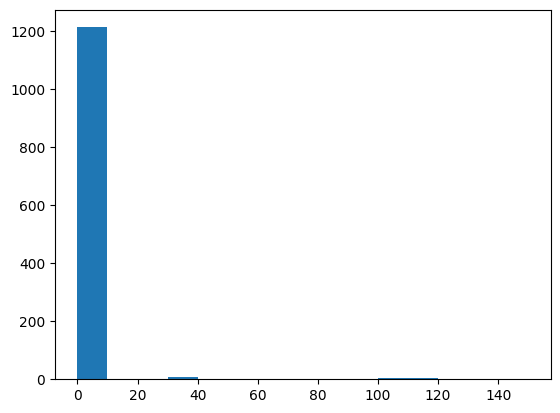

In [85]:
plt.hist(df['Parking'],bins=[0,10,20,30,40,50,60,70,80,90,100,120,130,140,150])

(array([1.214e+03, 1.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        120., 130., 140., 150.]),
 <BarContainer object of 14 artists>)

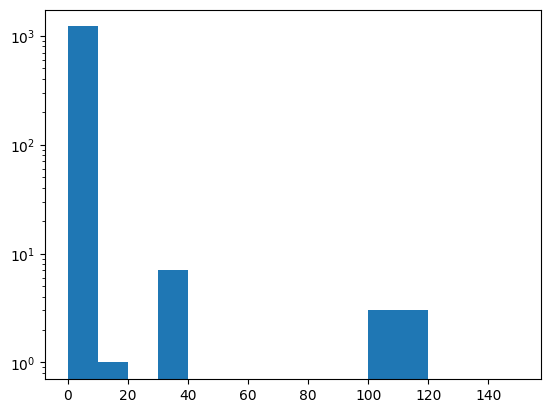

In [86]:
plt.hist(df['Parking'],bins=[0,10,20,30,40,50,60,70,80,90,100,120,130,140,150],log=True)

In [150]:
df=df[df['Parking']<=4]
df.describe()

,Area,BHK,Bathroom,Parking,Price
count,1206.000000,1206.000000,1206.000000,1206.000000,1.206000e+03
mean,1476.942446,2.809287,2.575456,1.412106,2.143329e+07
std,1587.290097,0.941499,1.034923,0.641693,2.530145e+07
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,810.000000,2.000000,2.000000,1.000000,5.800000e+06
50%,1200.000000,3.000000,2.000000,1.000000,1.450000e+07
75%,1700.000000,3.000000,3.000000,2.000000,2.597500e+07
max,24300.000000,10.000000,7.000000,4.000000,2.400000e+08


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1206 non-null   float64
 1   BHK          1206 non-null   int64  
 2   Bathroom     1206 non-null   float64
 3   Furnishing   1206 non-null   object 
 4   Locality     1206 non-null   object 
 5   Parking      1206 non-null   float64
 6   Price        1206 non-null   int64  
 7   Status       1206 non-null   object 
 8   Transaction  1206 non-null   object 
 9   Type         1206 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 103.6+ KB


In [89]:
(df['Area']/df['BHK']).describe()

count    1206.000000
mean      501.794691
std       421.426529
min        11.250000
25%       350.000000
50%       450.000000
75%       551.875000
max      6075.000000
dtype: float64

In [151]:
df=df[(df['Area']/df['BHK'])>=300]
df.describe()

,Area,BHK,Bathroom,Parking,Price
count,1037.000000,1037.000000,1037.000000,1037.000000,1.037000e+03
mean,1628.805721,2.847637,2.686596,1.452266,2.397982e+07
std,1660.034836,0.927865,1.031897,0.662631,2.634026e+07
min,300.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,950.000000,2.000000,2.000000,1.000000,7.400000e+06
50%,1350.000000,3.000000,3.000000,1.000000,1.600000e+07
75%,1800.000000,3.000000,3.000000,2.000000,2.860000e+07
max,24300.000000,7.000000,7.000000,4.000000,2.400000e+08


In [91]:
(df['Price']/df['Area']).describe()

count     1037.000000
mean     13423.153526
std       7469.958227
min        204.081633
25%       7500.000000
50%      12272.727273
75%      17666.666667
max      48611.111111
dtype: float64

(array([119., 258., 272., 192., 104.,  58.,  20.,   8.,   2.,   4.]),
 array([  204.08163265,  5044.7845805 ,  9885.48752834, 14726.19047619,
        19566.89342404, 24407.59637188, 29248.29931973, 34089.00226757,
        38929.70521542, 43770.40816327, 48611.11111111]),
 <BarContainer object of 10 artists>)

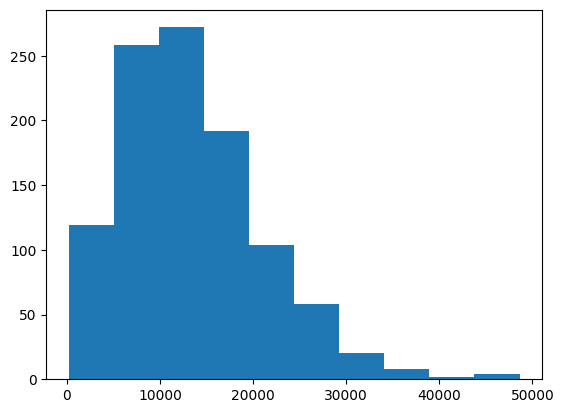

In [92]:
plt.hist((df['Price']/df['Area']))

In [152]:
df=df[(df['Price']/df['Area'])>=1000]
df=df[(df['Price']/df['Area'])<=25000]
df.describe()

,Area,BHK,Bathroom,Parking,Price
count,956.000000,956.000000,956.000000,956.000000,9.560000e+02
mean,1555.096059,2.784519,2.593096,1.424686,1.980541e+07
std,1650.763182,0.901198,0.965756,0.648460,1.841833e+07
min,300.000000,1.000000,1.000000,1.000000,1.200000e+06
25%,900.000000,2.000000,2.000000,1.000000,6.997500e+06
50%,1300.000000,3.000000,2.000000,1.000000,1.500000e+07
75%,1700.000000,3.000000,3.000000,2.000000,2.500000e+07
max,24300.000000,7.000000,7.000000,4.000000,1.700000e+08


In [94]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2.0,Furnished,other,1.0,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2.0,Semi-Furnished,other,1.0,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,other,1.0,6200000,Ready_to_move,New_Property,Builder_Floor
5,1300.0,4,3.0,Semi-Furnished,other,1.0,15500000,Ready_to_move,New_Property,Builder_Floor


In [95]:
df['Status'].unique()

array(['Ready_to_move', 'Almost_ready'], dtype=object)

In [96]:
df['Transaction'].unique()

array(['New_Property', 'Resale'], dtype=object)

In [97]:
df['Type'].unique()

array(['Apartment', 'Builder_Floor'], dtype=object)

In [153]:
df['Status']=df['Status'].map({'Ready_to_move':1,'Almost_ready':0})
df['Transaction']=df['Transaction'].map({"New_Property":1,"Resale":0})
df['Type']=df['Type'].map({"Apartment":1,'Builder_Floor':0})
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,1,1,1
2,950.0,2,2.0,Furnished,other,1.0,15500000,1,0,1
3,600.0,2,2.0,Semi-Furnished,other,1.0,4200000,1,0,0
4,650.0,2,2.0,Semi-Furnished,other,1.0,6200000,1,1,0
5,1300.0,4,3.0,Semi-Furnished,other,1.0,15500000,1,1,0


In [99]:
df['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [154]:
furnish_status=pd.get_dummies(df['Furnishing'])
furnish_status.head()

,Furnished,Semi-Furnished,Unfurnished
1,False,True,False
2,True,False,False
3,False,True,False
4,False,True,False
5,False,True,False


In [155]:
furnish_status=pd.get_dummies(df['Furnishing'],drop_first=True)
furnish_status.head()

,Semi-Furnished,Unfurnished
1,True,False
2,False,False
3,True,False
4,True,False
5,True,False


In [156]:
df = pd.concat([df,furnish_status],axis=1)
df.drop(['Furnishing'],axis=1,inplace=True)
df.head()



,Area,BHK,Bathroom,Locality,Parking,Price,Status,Transaction,Type,Semi-Furnished,Unfurnished
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,1,1,1,True,False
2,950.0,2,2.0,other,1.0,15500000,1,0,1,False,False
3,600.0,2,2.0,other,1.0,4200000,1,0,0,True,False
4,650.0,2,2.0,other,1.0,6200000,1,1,0,True,False
5,1300.0,4,3.0,other,1.0,15500000,1,1,0,True,False


In [157]:
df['Semi-Furnished']=df['Semi-Furnished'].map(lambda x: 1 if x is True else 0)
df['Unfurnished']=df['Unfurnished'].map(lambda x: 1 if x is True else 0)
df.head()

,Area,BHK,Bathroom,Locality,Parking,Price,Status,Transaction,Type,Semi-Furnished,Unfurnished
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,1,1,1,1,0
2,950.0,2,2.0,other,1.0,15500000,1,0,1,0,0
3,600.0,2,2.0,other,1.0,4200000,1,0,0,1,0
4,650.0,2,2.0,other,1.0,6200000,1,1,0,1,0
5,1300.0,4,3.0,other,1.0,15500000,1,1,0,1,0


In [158]:
df.to_csv("Cleaned_data")

In [159]:
x=df.drop(columns=['Price'])
y=df['Price']

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score




In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [165]:
print(x_train.shape)
print(x_test.shape)

(764, 10)
(192, 10)


In [167]:
column_trans=make_column_transformer((OneHotEncoder(),['Locality']),remainder='passthrough')

In [168]:
scaler=StandardScaler()

In [169]:
from sklearn.pipeline import make_pipeline

In [178]:
lr=LinearRegression()


In [179]:
model=make_pipeline(column_trans,scaler,lr)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)